<a href="https://colab.research.google.com/github/farrelrassya/Machine-Learning-with-Imbalanced-Dataset-Udemy/blob/main/Section%203%20Metrics%20Evaluation%20/10_Probability.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score

from yellowbrick.classifier import DiscriminationThreshold

import warnings
warnings.filterwarnings("ignore")

In [2]:
# create balanced dataset based of sklearn
# breast cancer dataset


def load_balanced_data(num_obs, random_state):
    X, y = load_breast_cancer(return_X_y=True)
    X = pd.DataFrame(X)
    X['target'] = y

    X_bal = pd.concat([
        X[y == 0].sample(num_obs, random_state=random_state),
        X[y == 1].sample(
            num_obs, random_state=random_state)
    ],axis=0)

    y = X_bal['target']
    y = y.map({0: 1, 1: 0})
    X = X_bal.drop('target', axis=1)

    return X.reset_index(drop=True), y.reset_index(drop=True)


In [3]:
# prepare data

X, y = load_balanced_data(num_obs=100, random_state=10)

X

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,17.680,20.74,117.40,963.7,0.11150,0.16650,0.18550,0.10540,0.1971,0.06166,...,20.470,25.11,132.90,1302.0,0.1418,0.34980,0.35830,0.15150,0.2463,0.07738
1,21.100,20.52,138.10,1384.0,0.09684,0.11750,0.15720,0.11550,0.1554,0.05661,...,25.680,32.07,168.20,2022.0,0.1368,0.31010,0.43990,0.22800,0.2268,0.07425
2,17.570,15.05,115.00,955.1,0.09847,0.11570,0.09875,0.07953,0.1739,0.06149,...,20.010,19.52,134.90,1227.0,0.1255,0.28120,0.24890,0.14560,0.2756,0.07919
3,16.350,23.29,109.00,840.4,0.09742,0.14970,0.18110,0.08773,0.2175,0.06218,...,19.380,31.03,129.30,1165.0,0.1415,0.46650,0.70870,0.22480,0.4824,0.09614
4,17.080,27.15,111.20,930.9,0.09898,0.11100,0.10070,0.06431,0.1793,0.06281,...,22.960,34.49,152.10,1648.0,0.1600,0.24440,0.26390,0.15550,0.3010,0.09060
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,9.738,11.97,61.24,288.5,0.09250,0.04102,0.00000,0.00000,0.1903,0.06422,...,10.620,14.10,66.53,342.9,0.1234,0.07204,0.00000,0.00000,0.3105,0.08151
196,14.960,19.10,97.03,687.3,0.08992,0.09823,0.05940,0.04819,0.1879,0.05852,...,16.250,26.19,109.10,809.8,0.1313,0.30300,0.18040,0.14890,0.2962,0.08472
197,9.876,19.40,63.95,298.3,0.10050,0.09697,0.06154,0.03029,0.1945,0.06322,...,10.760,26.83,72.22,361.2,0.1559,0.23020,0.26440,0.09749,0.2622,0.08490
198,12.950,16.02,83.14,513.7,0.10050,0.07943,0.06155,0.03370,0.1730,0.06470,...,13.740,19.93,88.81,585.4,0.1483,0.20680,0.22410,0.10560,0.3380,0.09584


In [4]:
# balancing ratio

y.value_counts() / len(y)


1    0.5
0    0.5
Name: target, dtype: float64

In [5]:
# number of observations per class

y.value_counts()

1    100
0    100
Name: target, dtype: int64

In [6]:
# separate dataset into train and test

X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.3,
    random_state=0)

X_train.shape, X_test.shape


((140, 30), (60, 30))

In [7]:
# create imbalanced dataset based of sklearn
# breast cancer dataset


def load_imbalanced_data():
    X, y = load_breast_cancer(return_X_y=True)
    X = pd.DataFrame(X)
    X['target'] = y

    X_bal = pd.concat([
        X[y == 0].sample(100, random_state=1), X[y == 1].sample(
            10000, random_state=1, replace=True)
    ],
                      axis=0)

    y = X_bal['target']
    y = y.map({0: 1, 1: 0})
    X = X_bal.drop('target', axis=1)

    return X.reset_index(drop=True), y.reset_index(drop=True)

In [8]:
# prepare data

X_im, y_im = load_imbalanced_data()

X_im.head()

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,15.10,22.02,97.26,712.8,0.09056,0.07081,0.05253,0.03334,0.1616,0.05684,...,18.10,31.69,117.7,1030.0,0.1389,0.2057,0.2712,0.1530,0.2675,0.07873
1,19.44,18.82,128.10,1167.0,0.10890,0.14480,0.22560,0.11940,0.1823,0.06115,...,23.96,30.39,153.9,1740.0,0.1514,0.3725,0.5936,0.2060,0.3266,0.09009
2,17.20,24.52,114.20,929.4,0.10710,0.18300,0.16920,0.07944,0.1927,0.06487,...,23.32,33.82,151.6,1681.0,0.1585,0.7394,0.6566,0.1899,0.3313,0.13390
3,21.09,26.57,142.70,1311.0,0.11410,0.28320,0.24870,0.14960,0.2395,0.07398,...,26.68,33.48,176.5,2089.0,0.1491,0.7584,0.6780,0.2903,0.4098,0.12840
4,13.48,20.82,88.40,559.2,0.10160,0.12550,0.10630,0.05439,0.1720,0.06419,...,15.53,26.02,107.3,740.4,0.1610,0.4225,0.5030,0.2258,0.2807,0.10710


In [9]:
# check balancing ratio

y_im.value_counts() / len(X_im)

0    0.990099
1    0.009901
Name: target, dtype: float64

In [10]:
# separate dataset into train and test

X_train_im, X_test_im, y_train_im, y_test_im = train_test_split(
    X_im,
    y_im,
    test_size=0.3,
    random_state=0)

X_train_im.shape, X_test_im.shape

((7070, 30), (3030, 30))

In [11]:
print('Likelihood of a patient being positive for the diagnose: {} '.format(
    np.round(y_test.mean(),3)))

print('Likelihood of a patient being positive for the diagnose: {} '.format(
    np.round(y_test_im.mean(), 3)))

Likelihood of a patient being positive for the diagnose: 0.483 
Likelihood of a patient being positive for the diagnose: 0.008 


In [12]:
# Logistic Regression on balanced dataset

logit = LogisticRegression(
    penalty='l2',
    solver='newton-cg',
    C=1,
    random_state=0,
    max_iter=20,
).fit(X_train, y_train)

# score the test set
probs = logit.predict_proba(X_test)[:, 1]

In [13]:
roc_auc_score(y_test, probs)

0.9977753058954394

In [14]:
# Logistic Regression on imbalanced dataset

logit_im = LogisticRegression(
    penalty='l2',
    solver='newton-cg',
    C=1,
    random_state=0,
    max_iter=20,
).fit(X_im, y_im)

# score the test set
probs_im = logit_im.predict_proba(X_test_im)[:, 1]


In [15]:
roc_auc_score(y_test_im, probs_im)

0.9929873772791025

In [16]:
# probability of a patient having cancer

y_test[probs>0.5].mean()

0.9333333333333333

In [17]:
y_test[probs<0.5].mean()

0.03333333333333333

In [18]:
# probability of a patient having cancer

y_test_im[probs_im>0.1].mean()

0.5384615384615384

In [19]:
# probability of a patient having cancer

y_test_im[probs_im<0.1].mean()

0.0006686726847208291

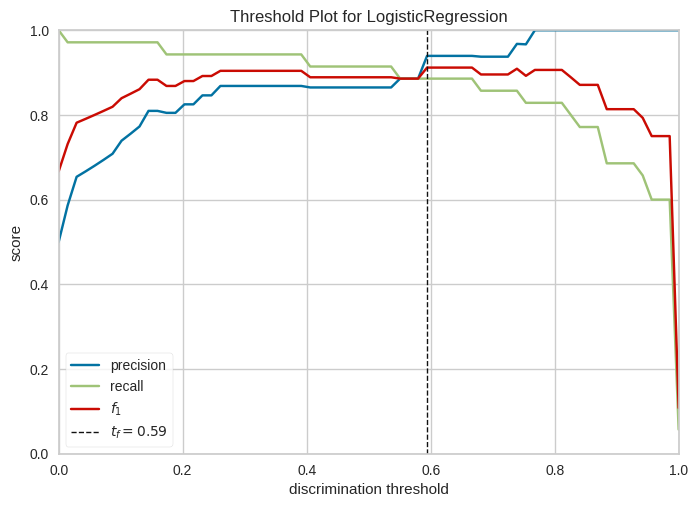

<Axes: title={'center': 'Threshold Plot for LogisticRegression'}, xlabel='discrimination threshold', ylabel='score'>

In [20]:
visualizer = DiscriminationThreshold(logit,
                                     n_trials=1,
                                     cv=0.5,
                                     argmax='fscore',
                                     random_state=0,
                                     is_fitted='auto',
                                     exclude = "queue_rate")

visualizer.fit(X_train, y_train)        # Fit the visualizer and the model
visualizer.score(X_test, y_test)        # Evaluate the model on the test data
visualizer.show()

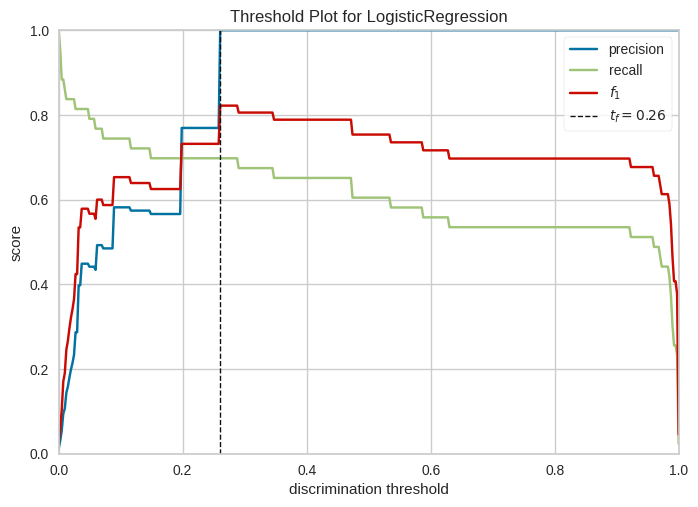

<Axes: title={'center': 'Threshold Plot for LogisticRegression'}, xlabel='discrimination threshold', ylabel='score'>

In [21]:
visualizer = DiscriminationThreshold(logit_im,
                                     n_trials=1,
                                     cv=0.5,
                                     argmax='fscore',
                                     random_state=0,
                                     is_fitted='auto',
                                     exclude = "queue_rate")

visualizer.fit(X_train_im, y_train_im)        # Fit the visualizer and the model
visualizer.score(X_test_im, y_test_im)        # Evaluate the model on the test data
visualizer.show()